In [70]:
import matplotlib.pyplot as plt
import numpy as np;
import pandas as pd;
from sklearn import datasets, linear_model, preprocessing
from sklearn.metrics import mean_squared_error, r2_score
import math
from keras.models import Sequential
from keras.layers import Dense

In [71]:
import warnings
warnings.filterwarnings('ignore')

In [72]:
house_data = pd.read_csv('kc_house_data.csv')

In [73]:
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [74]:
house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [75]:
house_data = house_data.sample(frac=1).reset_index(drop=True)

In [76]:
x_data = house_data['sqft_living'];
y_data = house_data['price'];

In [77]:
x_data = np.array(x_data)
y_data = np.array(y_data)

In [78]:
x_data.shape

(21613,)

In [79]:
x_data = x_data.reshape(-1,1)
y_data = y_data.reshape(-1,1)

In [80]:
ss = preprocessing.StandardScaler()
x_data = ss.fit_transform(x_data)

In [81]:
train_x_data = x_data[:-4322]
test_x_data = x_data[-4322:]

In [82]:
train_x_data.shape

(17291, 1)

In [83]:
train_y_data = y_data[:-4322]
test_y_data = y_data[-4322:]

In [84]:
regr = linear_model.LinearRegression();

In [85]:
regr.fit(train_x_data, train_y_data);

In [86]:
regr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
train_pred = regr.predict(train_x_data);

In [88]:
test_pred = regr.predict(test_x_data)

In [89]:
regr.coef_

array([[255098.54269211]])

In [90]:
regr.intercept_

array([539330.51478598])

In [91]:
error = mean_squared_error(y_true=test_y_data, y_pred=test_pred)

In [92]:
math.sqrt(error)

270394.76124132326

In [93]:
r2_score(train_y_data, train_pred)

0.4895967219571731

In [94]:
r2_score(test_y_data, test_pred)

0.5041968943614799

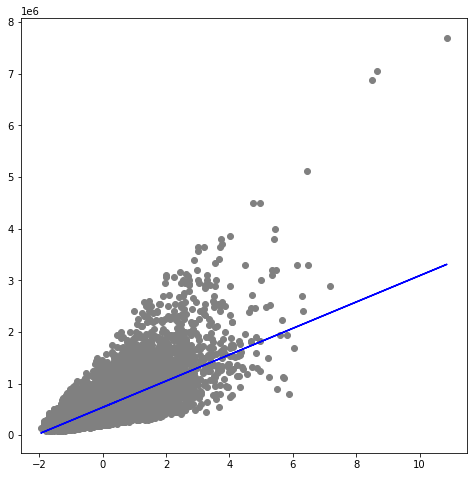

In [95]:
plt.figure(figsize=(8,8))
plt.scatter(train_x_data, train_y_data, color='gray')
plt.plot(train_x_data, train_pred, color='blue')
plt.show()

NN Model

In [96]:
model = Sequential();

In [97]:
model.add(Dense(input_dim=1, output_dim=1, init='uniform', activation='linear'))

In [98]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [99]:
model.layers[0].get_weights()

[array([[-0.02004523]], dtype=float32), array([0.], dtype=float32)]

In [100]:
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

In [101]:
history = model.fit(train_x_data, train_y_data, validation_split=0.2, epochs=300, verbose=1)

Train on 13832 samples, validate on 3459 samples
Epoch 1/300
13832/13832 [==============================] - 0s 33us/step - loss: 88160549815.1533 - mae: 193101.1562 - val_loss: 66874966963.3258 - val_mae: 175105.4688
Epoch 2/300
13832/13832 [==============================] - 0s 31us/step - loss: 67536364026.9659 - mae: 171534.2188 - val_loss: 66988741802.8147 - val_mae: 178692.7500
Epoch 3/300
13832/13832 [==============================] - 0s 31us/step - loss: 67537073831.3106 - mae: 172485.8438 - val_loss: 66828148117.8699 - val_mae: 175587.4531
Epoch 4/300
13832/13832 [==============================] - 0s 30us/step - loss: 67241579140.3678 - mae: 171928.0938 - val_loss: 66751070837.9717 - val_mae: 176438.8906
Epoch 5/300
13832/13832 [==============================] - 0s 30us/step - loss: 67354610566.5888 - mae: 171127.9688 - val_loss: 68399697831.1882 - val_mae: 184641.5469
Epoch 6/300
13832/13832 [==============================] - 0s 30us/step - loss: 67635362683.9283 - mae: 172855.

In [102]:
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(history.epoch, np.array(history.history['mean_absolute_error']), label='Train loss')
  plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']), label='Val loss')
  plt.legend()
  plt.show()

In [103]:
train_pred_nn = model.predict(train_x_data)

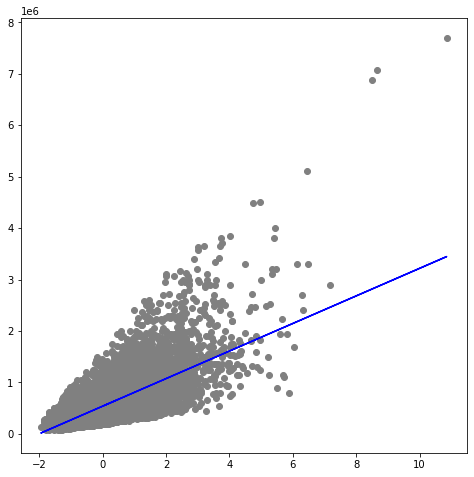

In [104]:
plt.figure(figsize=(8,8))
plt.scatter(train_x_data, train_y_data, color='gray')
plt.plot(train_x_data, train_pred_nn, color='blue')
plt.show()

In [105]:
train_pred_nn

array([[544662.6 ],
       [769221.9 ],
       [626320.5 ],
       ...,
       [317187.06],
       [576742.5 ],
       [664233.1 ]], dtype=float32)

In [107]:
[loss, mae] = model.evaluate(test_x_data, test_y_data)

4322/4322 [==============================] - 0s 16us/step


In [109]:
math.sqrt(loss)

270094.52234719304

In [110]:
mae

177480.546875

In [116]:
r2_score(train_y_data, train_pred_nn)

0.488372529975715